In [52]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [53]:
# Load the crypto_data.csv dataset.
file_path = "./resources/listings_cleaned2.csv"
df = pd.read_csv(file_path,index_col=0)
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Apartment,Entire home/apt,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,House,Entire home/apt,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Other,Private room,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [54]:
# Replace nulls with 'unknown'
df.time_since_first_review.replace('nan', 'unknown', inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.copy()
cols = ['property_type','price']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,0,Entire home/apt,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,0,Private room,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,0,Private room,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,1,Entire home/apt,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,2,Private room,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [57]:
df_encoded = pd.get_dummies(df, columns=['host_response_rate','property_type','price' ])
df_encoded.head()

,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,...,price_590,price_591,price_592,price_593,price_594,price_595,price_596,price_597,price_598,price_599
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,1,1,1,1,Western Addition,Entire home/apt,3,1,...,0,0,0,0,0,0,0,0,0,0
7918,6/17/2009,within a few hours,0,10,10,1,Haight Ashbury,Private room,2,4,...,0,0,0,0,0,0,0,0,0,0
8142,6/17/2009,within a few hours,0,10,10,1,Haight Ashbury,Private room,2,4,...,0,0,0,0,0,0,0,0,0,0
8339,7/2/2009,within an hour,0,2,2,1,Western Addition,Entire home/apt,5,1.5,...,0,0,0,0,0,0,0,0,0,0
8739,1/27/2009,within an hour,1,2,2,0,Mission,Private room,3,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_encoded.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,price_590,price_591,price_592,price_593,price_594,price_595,price_596,price_597,price_598,price_599
count,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,9425.000000,9972.000000,1.015300e+04,1.015300e+04,10153.000000,...,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000
mean,0.508618,35.736827,35.736827,0.746085,3.222299,1.449655,1.821400,9.864565e+03,1.031912e+04,7.713582,...,0.000098,0.000197,0.000098,0.000098,0.000098,0.000098,0.000197,0.000098,0.000098,0.000098
std,0.499950,185.959874,185.959874,0.435271,1.916841,0.903819,1.214483,9.924365e+05,9.924327e+05,9.936357,...,0.009924,0.014034,0.009924,0.009924,0.009924,0.009924,0.014034,0.009924,0.009924,0.009924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000e+00,2.800000e+01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000e+00,1.200000e+02,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,5.000000,1.000000,4.000000,2.000000,2.000000,3.000000e+01,1.125000e+03,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1987.000000,1987.000000,1.000000,16.000000,14.000000,14.000000,1.000000e+08,1.000000e+08,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


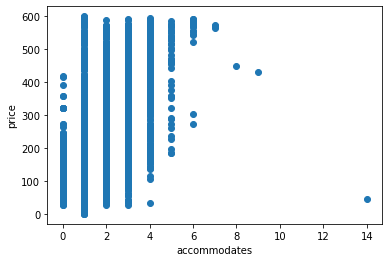

In [59]:
plt.scatter(df.bedrooms, df.price)
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

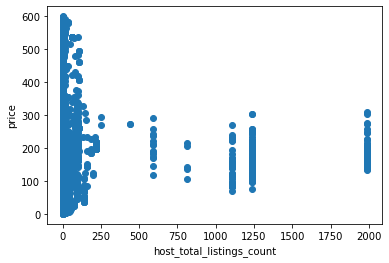

In [77]:
plt.scatter(df.host_total_listings_count, df.price)
plt.xlabel('host_total_listings_count')
plt.ylabel('price')
plt.show()

In [78]:
# The first argument of reshape() specifies the number of rows. Here, the argument is -1, and means that the number of rows is unspecified. Accordingly, the NumPy library will automatically identify the number of rows in the dataset.
# The second argument of reshape() refers to the number of columns. Here, the argument is 1, meaning that there is only one column of independent variables.
X = df.host_total_listings_count.values.reshape(-1, 1)

In [79]:
# we examine the first five entries in X, we see that the output is a two-dimensional NumPy array:
X[:5]

array([[ 1],
       [10],
       [10],
       [ 2],
       [ 2]], dtype=int64)

In [62]:
# When we examine the shape of X, we see that there are 30 rows and 1 column:
X.shape

(10153, 1)

In [86]:
# assign the target variable, or the Salary column, to y
y = df.accommodates

In [87]:
# The next step is to create an instance of the linear regression model. An object is instantiated, or created, from sklearn.linear_model's LinearRegression class. Instantiation here means that the LinearRegression class is like a template that contains the algorithms required to perform linear regression. From this template, a specific object called model is created that will analyze the data and store information specific to this dataset:
model = LinearRegression()

In [88]:
# After a model is instantiated, it will analyze the data and attempt to learn patterns in the data. This learning stage is alternatively called fitting or training:
model.fit(X, y)

LinearRegression()

In [89]:
# After the learning stage, the predict() method is used to generate predictions: given any number of bedrooms, the model will predict accomodation:
y_pred = model.predict(X)
print(y_pred.shape)


(10153,)


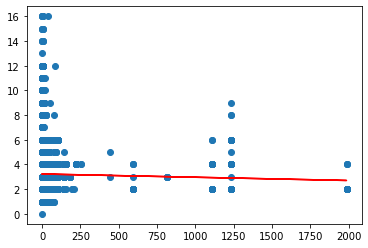

In [90]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [91]:
# The best fit line is in red, drawn through the predictions. The maximum value of bedrooms in the current dataset is 14.

In [92]:
# Finally, we can examine the specific parameters of our model: the slope and the y-intercept. The slope is represented by model.coef_, and model.intercept_ is the y-intercept:

In [93]:
print(model.coef_)
print(model.intercept_)

[-0.00026336]
3.2317105797340733


In [101]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


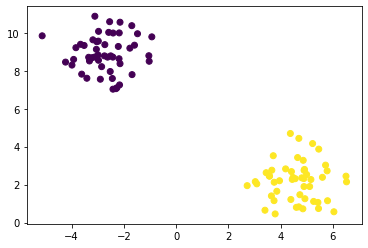

In [102]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [107]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [108]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [110]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [111]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [115]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[12  0]
 [ 0 13]]


In [116]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [131]:
from path import Path
import numpy as np
import pandas as pd

data = Path('./Resources/listings_cleaned2.csv')
df = pd.read_csv(data)
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
0,958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Apartment,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
1,7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
2,8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
3,8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,House,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
4,8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Other,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(75, 2)

In [133]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [134]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [135]:
# create predictions with the model:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [138]:
from sklearn.pipeline import make_pipeline

# Encode Labels With Pandas

In [139]:
import pandas as pd
from path import Path

file_path = Path("./Resources/listings_cleaned2.csv")
df = pd.read_csv(file_path)
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
0,958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Apartment,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
1,7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
2,8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
3,8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,House,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
4,8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Other,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [140]:
listings_binary_encoded = pd.get_dummies(df, columns=["property_type"])
listings_binary_encoded.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,room_type,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review,property_type_Apartment,property_type_House,property_type_Other
0,958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Entire home/apt,...,1,0,0,1.60,3958,4+ years,17,1,0,0
1,7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Private room,...,0,9,0,0.14,3637,4+ years,923,1,0,0
2,8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Private room,...,0,9,0,0.14,3637,4+ years,263,1,0,0
3,8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,Entire home/apt,...,2,0,0,0.23,3622,4+ years,295,0,1,0
4,8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Private room,...,0,2,0,5.61,3778,4+ years,12,0,0,1


In [141]:
listings_binary_encoded = pd.get_dummies(df, columns=["price", "property_type"])
listings_binary_encoded.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,room_type,...,price_3394,price_4500,price_5000,price_7000,price_8000,price_10000,price_25000,property_type_Apartment,property_type_House,property_type_Other
0,958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
1,7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Private room,...,0,0,0,0,0,0,0,1,0,0
2,8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Private room,...,0,0,0,0,0,0,0,1,0,0
3,8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,Entire home/apt,...,0,0,0,0,0,0,0,0,1,0
4,8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Private room,...,0,0,0,0,0,0,0,0,0,1


# Encode Labels With Scikit-learn

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.copy()
df['price'] = le.fit_transform(df['price'])

# Create Custom Encoding

In [150]:
label_encoder = LabelEncoder()
df["host_since"]= label_encoder.fit_transform(df["price"])
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
0,958,146,within a few hours,100%,1,1,1,1,Western Addition,Apartment,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
1,7918,41,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
2,8142,41,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
3,8339,478,within an hour,100%,0,2,2,1,Western Addition,House,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
4,8739,115,within an hour,100%,1,2,2,0,Mission,Other,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12
